In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    global img
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    edge()
    return img

# Create Edge Mask

In [3]:
def edge_mask(img, line_size, blur_value): # (Input: Input image) --> (Output: Edges of images)
    global edges
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

In [4]:
def edge():
    global edges
    line_size, blur_value = 25, 9
    edges = edge_mask(img, line_size, blur_value)  

# Reduce the color palette

In [5]:
def color_quntization(img, k): # k --> is the number of colors
    # Transform the image
    data = np.float32(img).reshape((-1, 3)) 
    
    # Determine criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001) 
    
    # Implementing k-means
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result

In [6]:
img = 0
edges = 0

def cartoon(filename):
    global img
    global edges
    
    # Call read_file function
    img = read_file(filename)
    
    
    # Copy Original image
    original_img = np.copy(img)
    
    
    # Quantiz the image
    img_quantiz = color_quntization(img, k = 16)
  

    # Reduce the noise
    blurred = cv2.bilateralFilter(img_quantiz, d = 1, sigmaColor = 200, sigmaSpace = 200)
    
    
    # Combine edge mask with the quantiz image
    c = cv2.bitwise_and(blurred, blurred, mask = edges)
    
    
    # Plot Steps of cartoonfy the image:
    
    # Plot Edges Image
    plt.figure(figsize=[15,10])
    plt.subplot(1,3,1)
    plt.imshow(edges, cmap = "gray")
    plt.title("Edges Image")
    
    
    # Plot Quantized Image
    plt.subplot(1,3,2)
    plt.imshow(img_quantiz)
    plt.title("Quantized Image")
    
    
    # Plot Blurred Image
    plt.subplot(1,3,3)
    plt.imshow(blurred)
    plt.title("Blurred Image")
    plt.show()
    
    
    # Plot Cartoonified Image
    plt.figure(figsize=[15,10])
    plt.subplot(1,2,1)
    plt.imshow(c)
    plt.title("Cartoonified Image")

    
    # Plot Original Image
    plt.subplot(1,2,2)
    plt.imshow(original_img)
    plt.title("Original Image")
    
    plt.show()

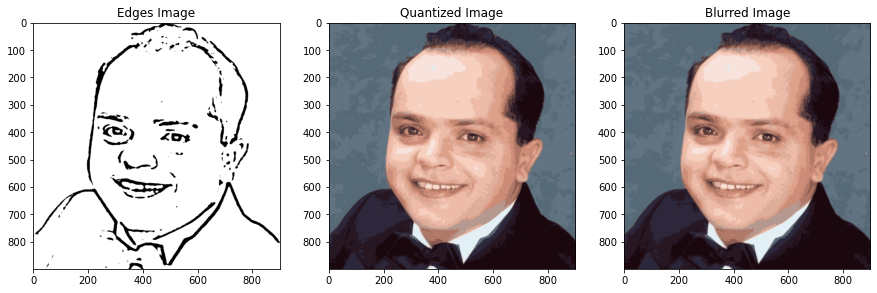

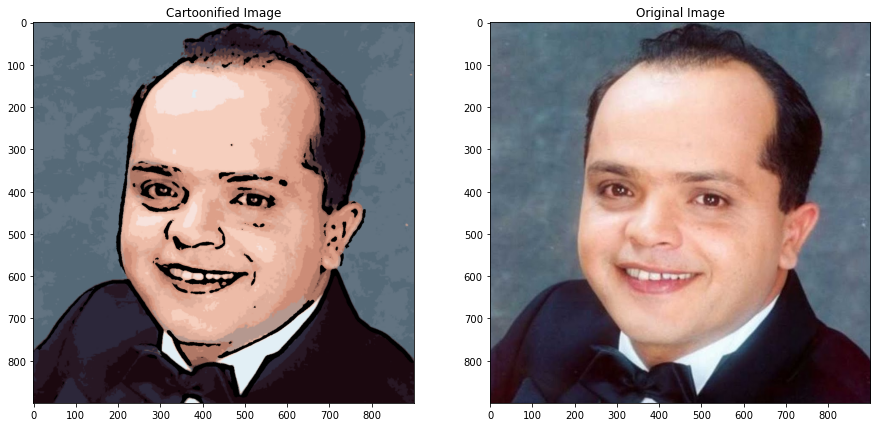

In [7]:
filename = r"C:\Users\Function\Desktop\cartoonfiy the image\mohamed henedy.jpg" # Path of your image.
cartoon(filename)

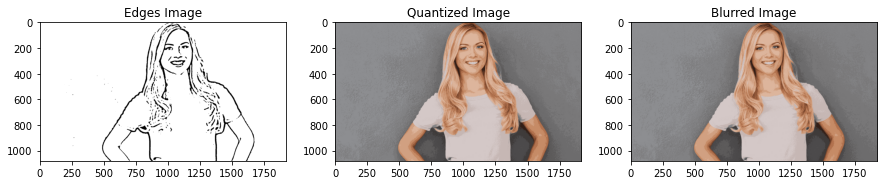

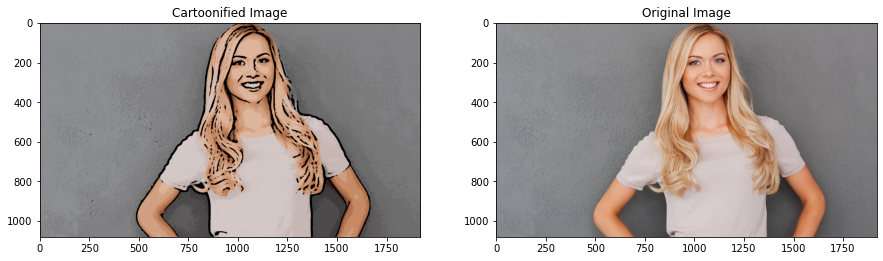

In [8]:
filename = r"C:\Users\Function\Desktop\cartoonfiy the image\woman.jpg" # Path of your image.
cartoon(filename)

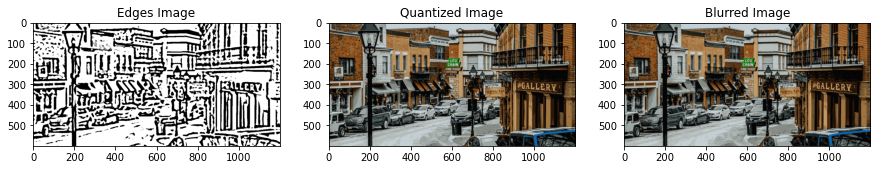

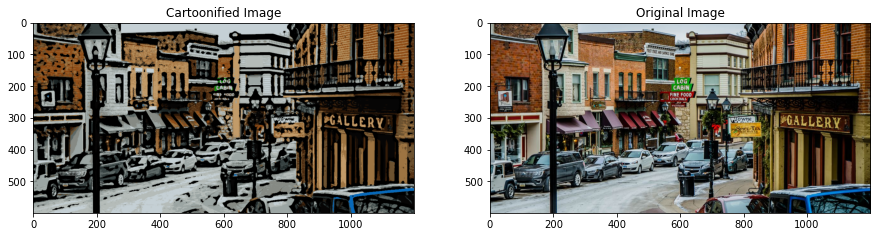

In [9]:
filename = r"C:\Users\Function\Desktop\cartoonfiy the image\town.jpg" # Path of your image.
cartoon(filename)

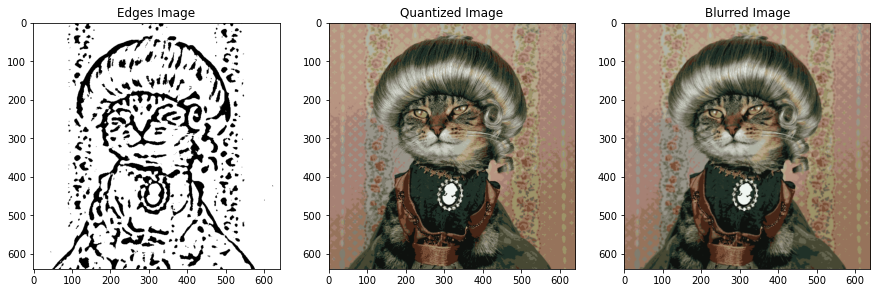

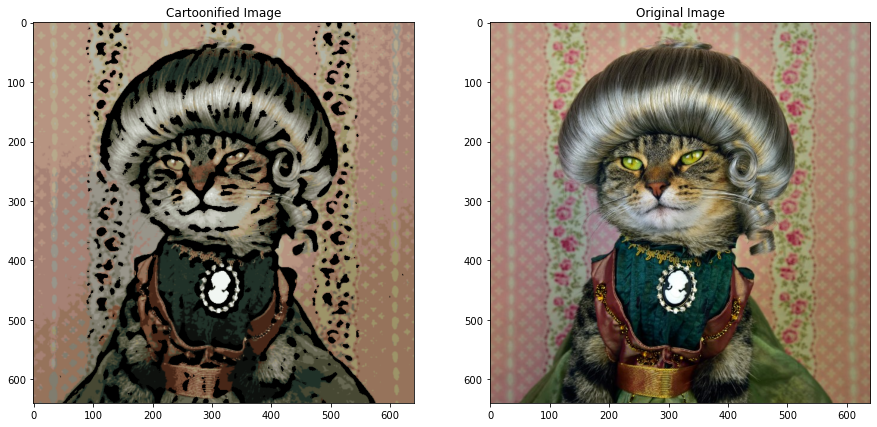

In [10]:
filename = r"C:\Users\Function\Desktop\cartoonfiy the image\cat.jpg" # Path of your image.
cartoon(filename)

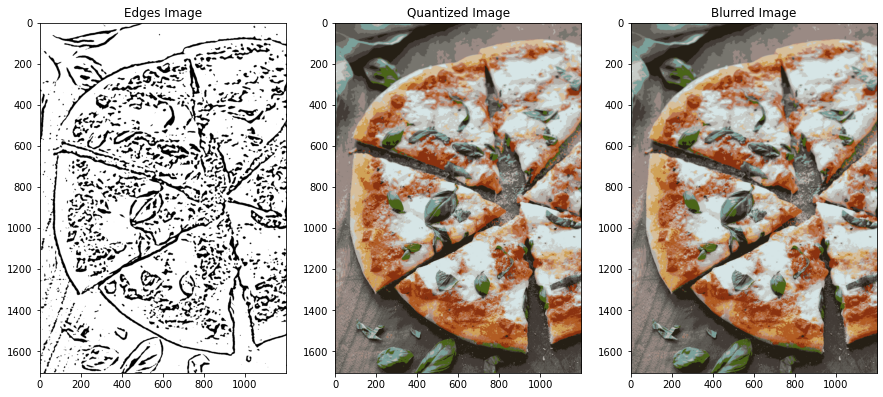

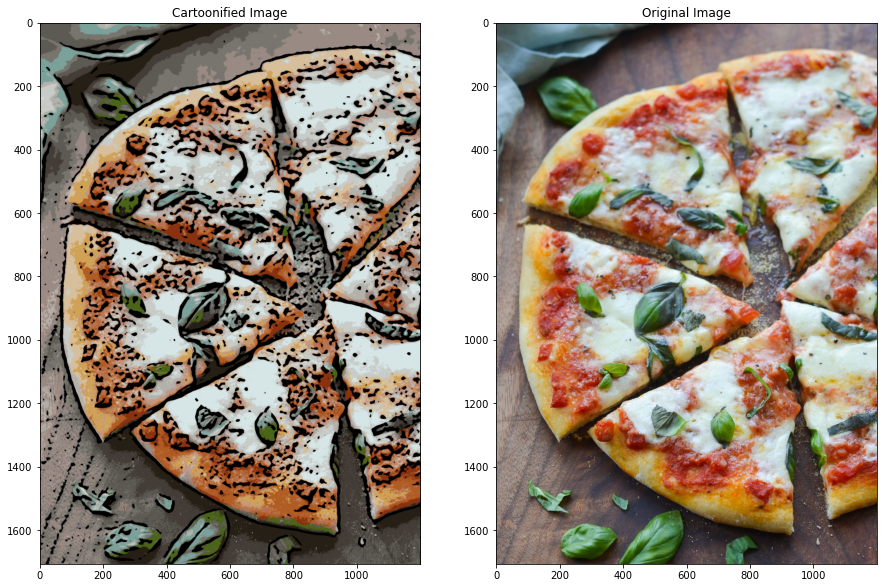

In [11]:
filename = r"C:\Users\Function\Desktop\cartoonfiy the image\pizza.jpg" # Path of your image.
cartoon(filename)